<a href="https://colab.research.google.com/github/nehagoyal1994/cs480student/blob/main/04/My_CS480_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

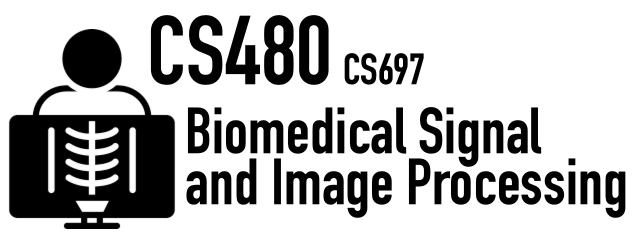
#Assignment 4

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# In this assignment, we will create a Random Forest classifier to detect pneumonia!

In [2]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [14]:
# we are using mahotas again, so lets install it!
!pip install mahotas

In [15]:
# our imports include sklearn this time
import mahotas as mh
import os
from sklearn.ensemble import RandomForestClassifier

**Task 1:** Download, extract, and load the data! [15 Points]

In [16]:
# Please download this file: https://cs480.org/data/xray.zip
# This is a subset of the Kaggle Pneumonia Dataset!
#
# TODO: Upload xray.zip using the file panel on the left.

In [17]:
# Run this code to extract the zip file and to create
# the folder structure of normal/ and pneumonia/ images.
# Each folder contains the first images of the Kaggle dataset
import  zipfile
with zipfile.ZipFile('/content/drive/MyDrive/xray.zip', 'r') as zip_ref:
  zip_ref.extractall('.')

NORMAL_DIR = 'normal/'
PNEUMONIA_DIR = 'pneumonia/'

In [18]:
# Here we load the first image from the normal dataset.
img = mh.imread(NORMAL_DIR + 'IM-0115-0001.jpeg')

In [19]:
# TODO: Please display this image and print the dimensions!

In [25]:
print("Dimensions are", img.shape)

Dimensions are (1858, 2090)


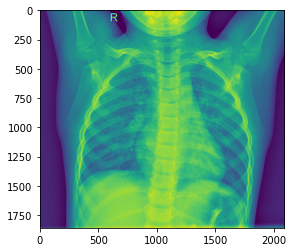

In [26]:
imshow(img)

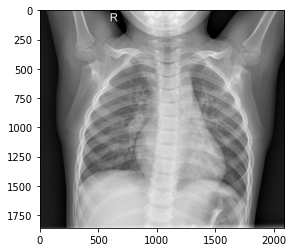

In [27]:
imshow(img, cmap= "gray")

**Task 2:** Let's do some data wrangling and more visualization! [35 Points]

In [31]:
# This code loads all normal images into a numpy array.
normal_files = os.listdir( NORMAL_DIR )

normal_images = np.zeros( (len(normal_files), 300, 300), dtype=np.float32)

for i in range(len(normal_files)):
  loaded_image = mh.imread( NORMAL_DIR + normal_files[i], as_grey=True )

  loaded_image = mh.imresize( loaded_image, (300, 300) )
  img_shape = loaded_image.shape

  normal_images[ i, 0:img_shape[0], 0:img_shape[1] ] = loaded_image
  

In [32]:
# This code loads all pneumonia images into a numpy array.
pneumonia_files = os.listdir( PNEUMONIA_DIR )

pneumonia_images = np.zeros( (len(pneumonia_files), 300, 300), dtype=np.float32)

for i in range(len(pneumonia_files)):
  loaded_image = mh.imread( PNEUMONIA_DIR + pneumonia_files[i], as_grey=True )
  
  loaded_image = mh.imresize( loaded_image, (300, 300) )
  img_shape = loaded_image.shape

  pneumonia_images[ i, 0:img_shape[0], 0:img_shape[1] ] = loaded_image

In [34]:
# The two code blocks above perform 2 data wrangling operations.
# Which ones?
# Hint: The first one might be more obvious but the second one happens in the
# last line of each block.
# TODO: Operation 1) Resizing the image 
# TODO: Operation 2) Adding array_from_image according to the sequence order in a numpy array

In [35]:
# Now, let's look at the first 5 normal_images and the first 5 pneumonia_images.
# TODO: Please visualize multiple images at once.
# Hint: You can use one of the following answers from StackOverflow for this:
# https://stackoverflow.com/questions/41210823/using-plt-imshow-to-display-multiple-images

In [36]:
# TODO: YOUR CODE

In [37]:
import matplotlib.pyplot as plt

def multiple_image(image_list, title, n):
  row = 1
  col = n
  print(title)
  fig = plt.figure(figsize(128,128))   #each fig size is 128x128
  for i in range(n):
    fig.add_subplot(row, col, i+1)    #image in fig plot of 1 row and 5 column
    plt.imshow(image_list[i], cmap= "gray")
  


# def process(filename: str=None) -> None:
#     """
#     View multiple images stored in files, stacking vertically

#     Arguments:
#         filename: str - path to filename containing image
#     """
#     image = mpimg.imread(filename)
#     # <something gets done here>
#     plt.figure()
#     plt.imshow(image)



First 5 normal images


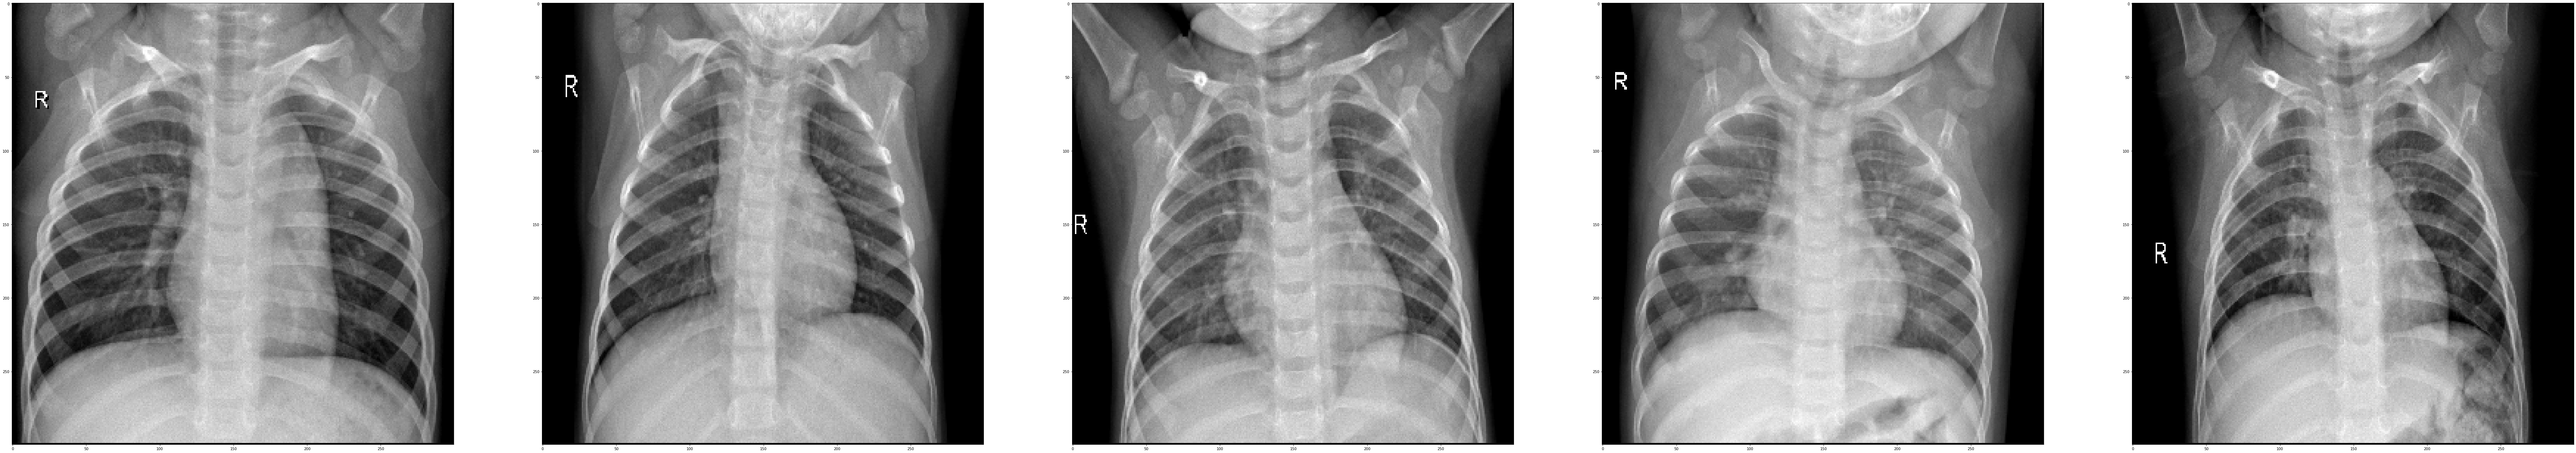

In [38]:
multiple_image(normal_images, 'First 5 normal images', 5)

First 5 pneumonia images


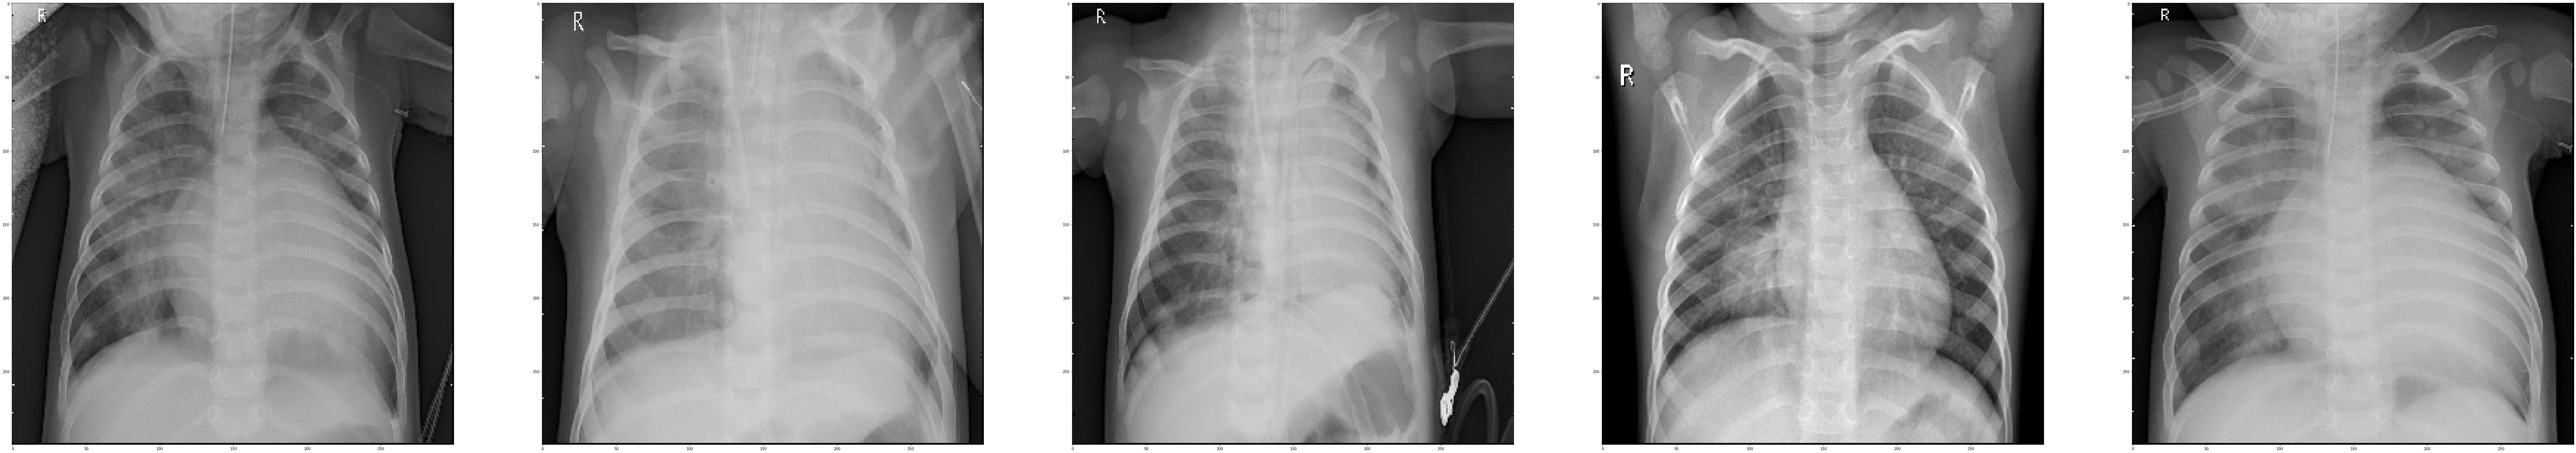

In [39]:
multiple_image(pneumonia_images, 'First 5 pneumonia images', 5)

**Task 3:** Setup training and testing data. [15 Points]

In [43]:
# Any supervised machine learning algorithm requires disjunct sets of
# training and testing data.
#
# For each, we will create a balanced dataset that includes an equal number
# of normal xrays and pneumonia xrays.
#
# The training data will include 120 images (60 normal, 60 pneumonia).
# The testing data will include the remaining 80 images (40 normal, 40 pneumonia).
#
# Supervised learning means that we tell the algorithm which image is normal
# and which image is pneumonia. For this, we need the training_target vector.
# The vector shall be 0 for a normal image, and 1 for a pneumonia.

In [44]:
TRAINING_COUNT = 60

training_data = np.zeros( (TRAINING_COUNT * 2, 300*300 ), dtype=np.float32)
training_target = np.zeros( (TRAINING_COUNT * 2), dtype=np.float32)
for i, n in enumerate( normal_images[0:TRAINING_COUNT] ):
  training_data[i] = n.ravel() # flatten the image
  
for i, p in enumerate( pneumonia_images[0:TRAINING_COUNT] ):
  training_data[i + TRAINING_COUNT] = p.ravel()
  

In [45]:
# TODO: Please create the training_target vector with 0 for a normal image, and
# 1 for a pneumonia.
training_target = np.zeros( (TRAINING_COUNT * 2), dtype=np.float32)
for i in range(TRAINING_COUNT):
  training_target[i + TRAINING_COUNT] = 1


120


In [46]:
TESTING_COUNT = 40

testing_data = np.zeros( (TESTING_COUNT * 2, 300*300 ), dtype=np.float32)
for i, n in enumerate( normal_images[TRAINING_COUNT:TRAINING_COUNT+TESTING_COUNT] ):
  testing_data[i] = n.ravel() # flatten the image
for i, p in enumerate( pneumonia_images[TRAINING_COUNT:TRAINING_COUNT+TESTING_COUNT] ):
  testing_data[i + TESTING_COUNT] = p.ravel()

In [47]:
# TODO: Please create the testing_target vector with 0 for a normal image, and
# 1 for a pneumonia.
testing_target = np.zeros( (TESTING_COUNT * 2), dtype=np.float32)
for i in range(TESTING_COUNT):
  testing_target[i+TESTING_COUNT] = 1


**Task 4:** Let's train and evaluate the Random Forest! [35 Points]

In [48]:
# With scikit-learn, we can easily set up a default Random Forest classifier.
clf = RandomForestClassifier()

In [49]:
# Now, we train the classifier with the training data and the training targets.
# We essentially show the classifier an image and tell whether the image is 
# normal or pneumonia.
fitted = clf.fit( training_data, training_target )

In [50]:
# TODO: In just a few sentences, please explain how the Random Forest works.

Using RF classifier muliple decision trees are conscructed from the given samples randomly to get a prediction result from each decision tree.The classifier then perform a vote for each predicted result and select result with the most votes as the final prediction.

An image is passed down each random tree until it reaches a leaf node. All the posterior probabilities at leaf nodes are then averaged and the arg max is taken as the classification of the input image. 

Randomness can be injected at two points during
training: in subsampling the training data so that each tree
is grown using a different subset; and in selecting the node
tests. This randomness prevents overfitting.

In [51]:
# After training, we can see how well the classifier predicts our testing data.
# The following command will return the classification accuracy.
clf.score( testing_data, testing_target )

0.9375

In [52]:
# TODO: Is the classification accuracy good? And, are you surprised?

Yes, the classification accuracy is good. It's above 90% which is expected from RF classifier.

As multiple decision trees are available for classification at the test space, this will increase the classification accuracy.
Also, RF Classifier works on principle where number of weak estimators when combined forms strong estimator. Thus, tends to give more accurate result.

In [ ]:
#

**Bonus:** Let's take a closer look! [33 Points]

In [54]:
# Can you figure out which images were misclassified?
# Hint: You can use predictions = clf.predict(testing_data) for this.
# Can you display them?
# Do you have an idea why these images were problematic?

In [55]:
# TODO: YOUR CODE AND YOUR ANSWER

In [56]:
misclassification  = np.where(testing_target != clf.predict(testing_data))[0]

In [60]:
misclassification

array([ 8, 17, 39, 74, 78])

In [58]:
misclassification_images = np.zeros( (len(misclassification), 300, 300), dtype=np.float32)

for i in range(len(misclassification_images)):
  index = misclassification[i]
  loaded_image = testing_data[index]
  loaded_image = loaded_image.reshape(300, 300)
  img_shape = loaded_image.shape

  misclassification_images[ i, 0:img_shape[0], 0:img_shape[1] ] = loaded_image
  

misclassified images


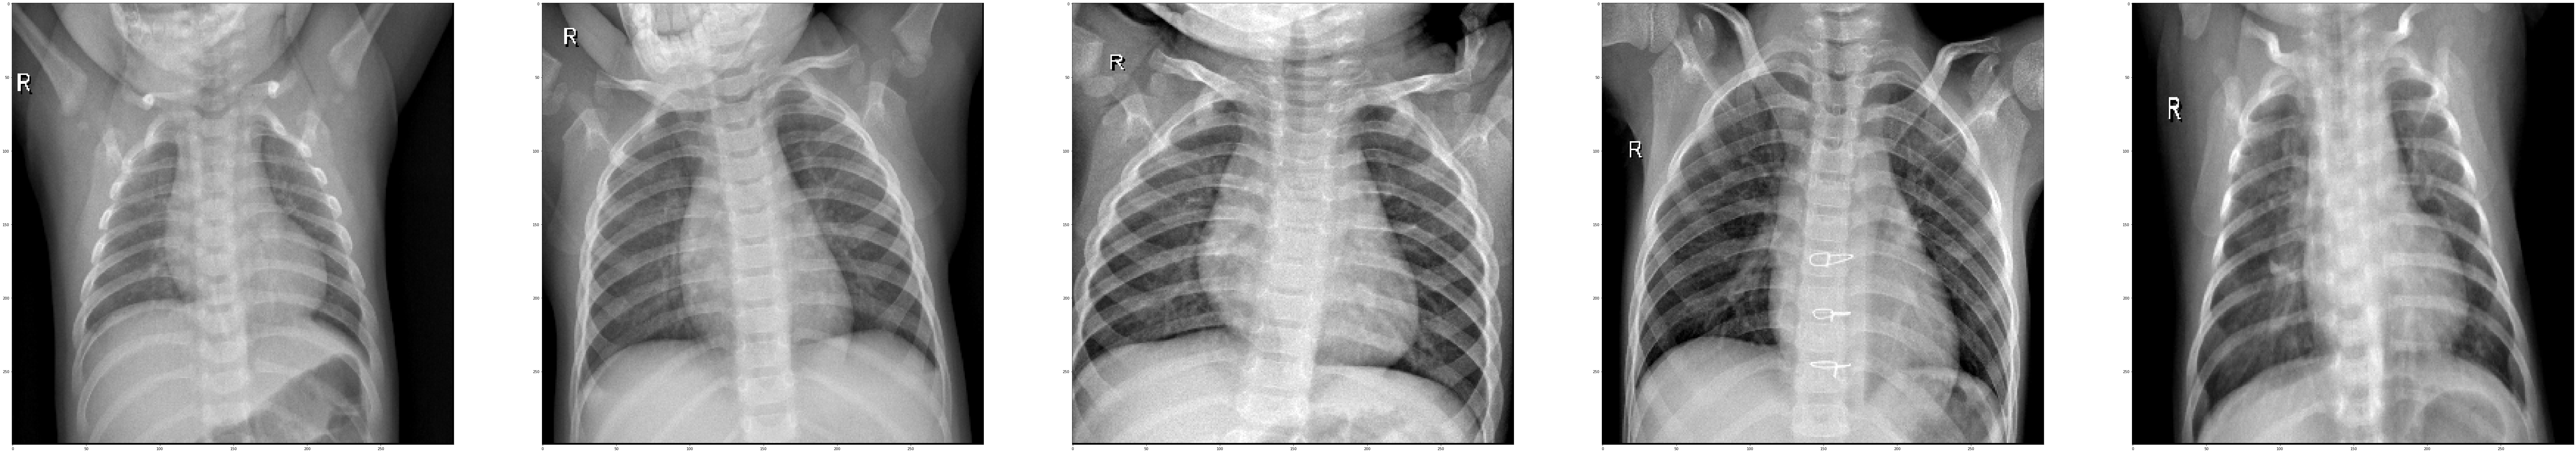

In [59]:
multiple_image(misclassification_images, 'misclassified images', len(misclassification_images))

If we compare the first five normal and pmeumonia images with the misclassified images. We see that last two images are more darker around the chest region and these intensities seem similar to the images in mormal list. This could be the reason to RF classifier predicted the images as label 0. Viceversa could be the case for images misclassified as label 1.

In [ ]:
# TODO: How can we improve the classification performance?
# Hint: Ideas without code are fine as well.

We can use Random Fern Classifier.

 In Random Forest Classifier the decision trees directly learn the posterior and applies different sequence of tests in each child node while Random Fern Classifier learns class-conditional distributions and applies the same sequence of tests to every input vector.

 Also, Random Forest Classifier combine tree hypotheses by averaging whereas Random Fern Classifier combine hypothesis using Bayes rule such that the training time grows linearly with fern size S.


 For more information # https://www.robots.ox.ac.uk/~vgg/publications/papers/bosch07a.pdf


In [ ]:
# Great job!!!
#           ___
#       _.-'   \
#      /        \
#     /          \
#    /            `.___
#   ( .--.)\/(,.--.    `-.
#   ,',-. \   / ,-.`.     )
#  ( /   \     /   \ )   / \
#   || .-|     |-. ||---'|  \
#  _|| | |     | | ||_   |   \
# /. \ |_|.---.|_| / ,\  | .^.\
# `.\ `--"     "--' /,'  |/
#   `>  _________ <'
# ,-' ,---.---.---. `-.
# `--'\    \j/    /`--'
#    `.\         /,'
#      \\_______//
#       `-------'       hjw